Se importa el fichero **Speed Dating Data.csv** del repositorio de Github, este contiene la data proveniente de Kagle.

In [ ]:
!git clone https://github.com/isaacuribej/speed_Dating_Project-

Cloning into 'speed_Dating_Project-'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 2.05 MiB | 6.47 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos a un DataFrame

In [ ]:
dating = pd.read_csv('/content/speed_Dating_Project-/Speed Dating Data.csv', encoding='ISO-8859-1')
dating.shape

(8378, 195)

# GRAFICACION DATOS FALTANTES
El siguiente fragmento de código crea una representación gráfica de una matriz binaria que muestra valores faltantes (NaN) en un DataFrame de Pandas llamado dating. La imagen se muestra en un subplot con una relación de aspecto de 55 y se etiquetan las marcas en el eje y con los nombres de las columnas del DataFrame.

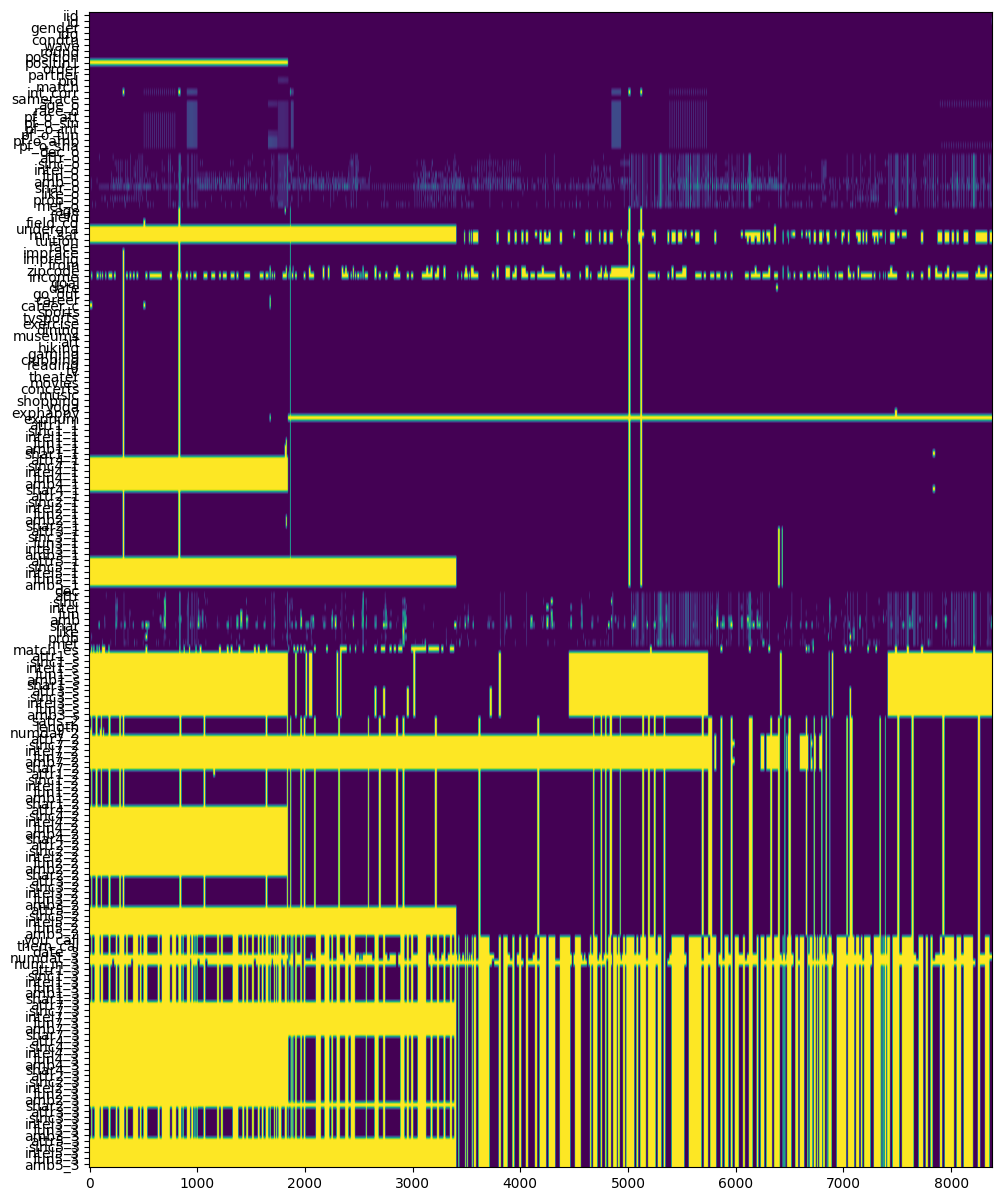

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(dating.isna().values.T)
ax.set_aspect(55)
plt.yticks(range(dating.shape[1]), dating.columns);

# SEGMENTACION DEL DATASET
Selecciona columnas específicas del DataFrame original dating y las concatena en un nuevo DataFrame llamado date. El resultado es un DataFrame que contiene solo las columnas seleccionadas, y su forma (shape) se imprime al final del código para mostrar cuántas filas y columnas tiene.

In [ ]:
datingTemp = []
datingTemp.append(dating.iloc[:, 0],)
datingTemp.append(dating.iloc[:, 2])
datingTemp.append(dating.iloc[:, 11:35])
datingTemp.append(dating.iloc[:, 39:43])
datingTemp.append(dating.iloc[:, 45:67])
datingTemp.append(dating.iloc[:, 69:75])
datingTemp.append(dating.iloc[:, 87:92])
datingTemp.append(dating.iloc[:, 97:107])

date = pd.concat(datingTemp, axis=1)
date.shape

(8378, 73)

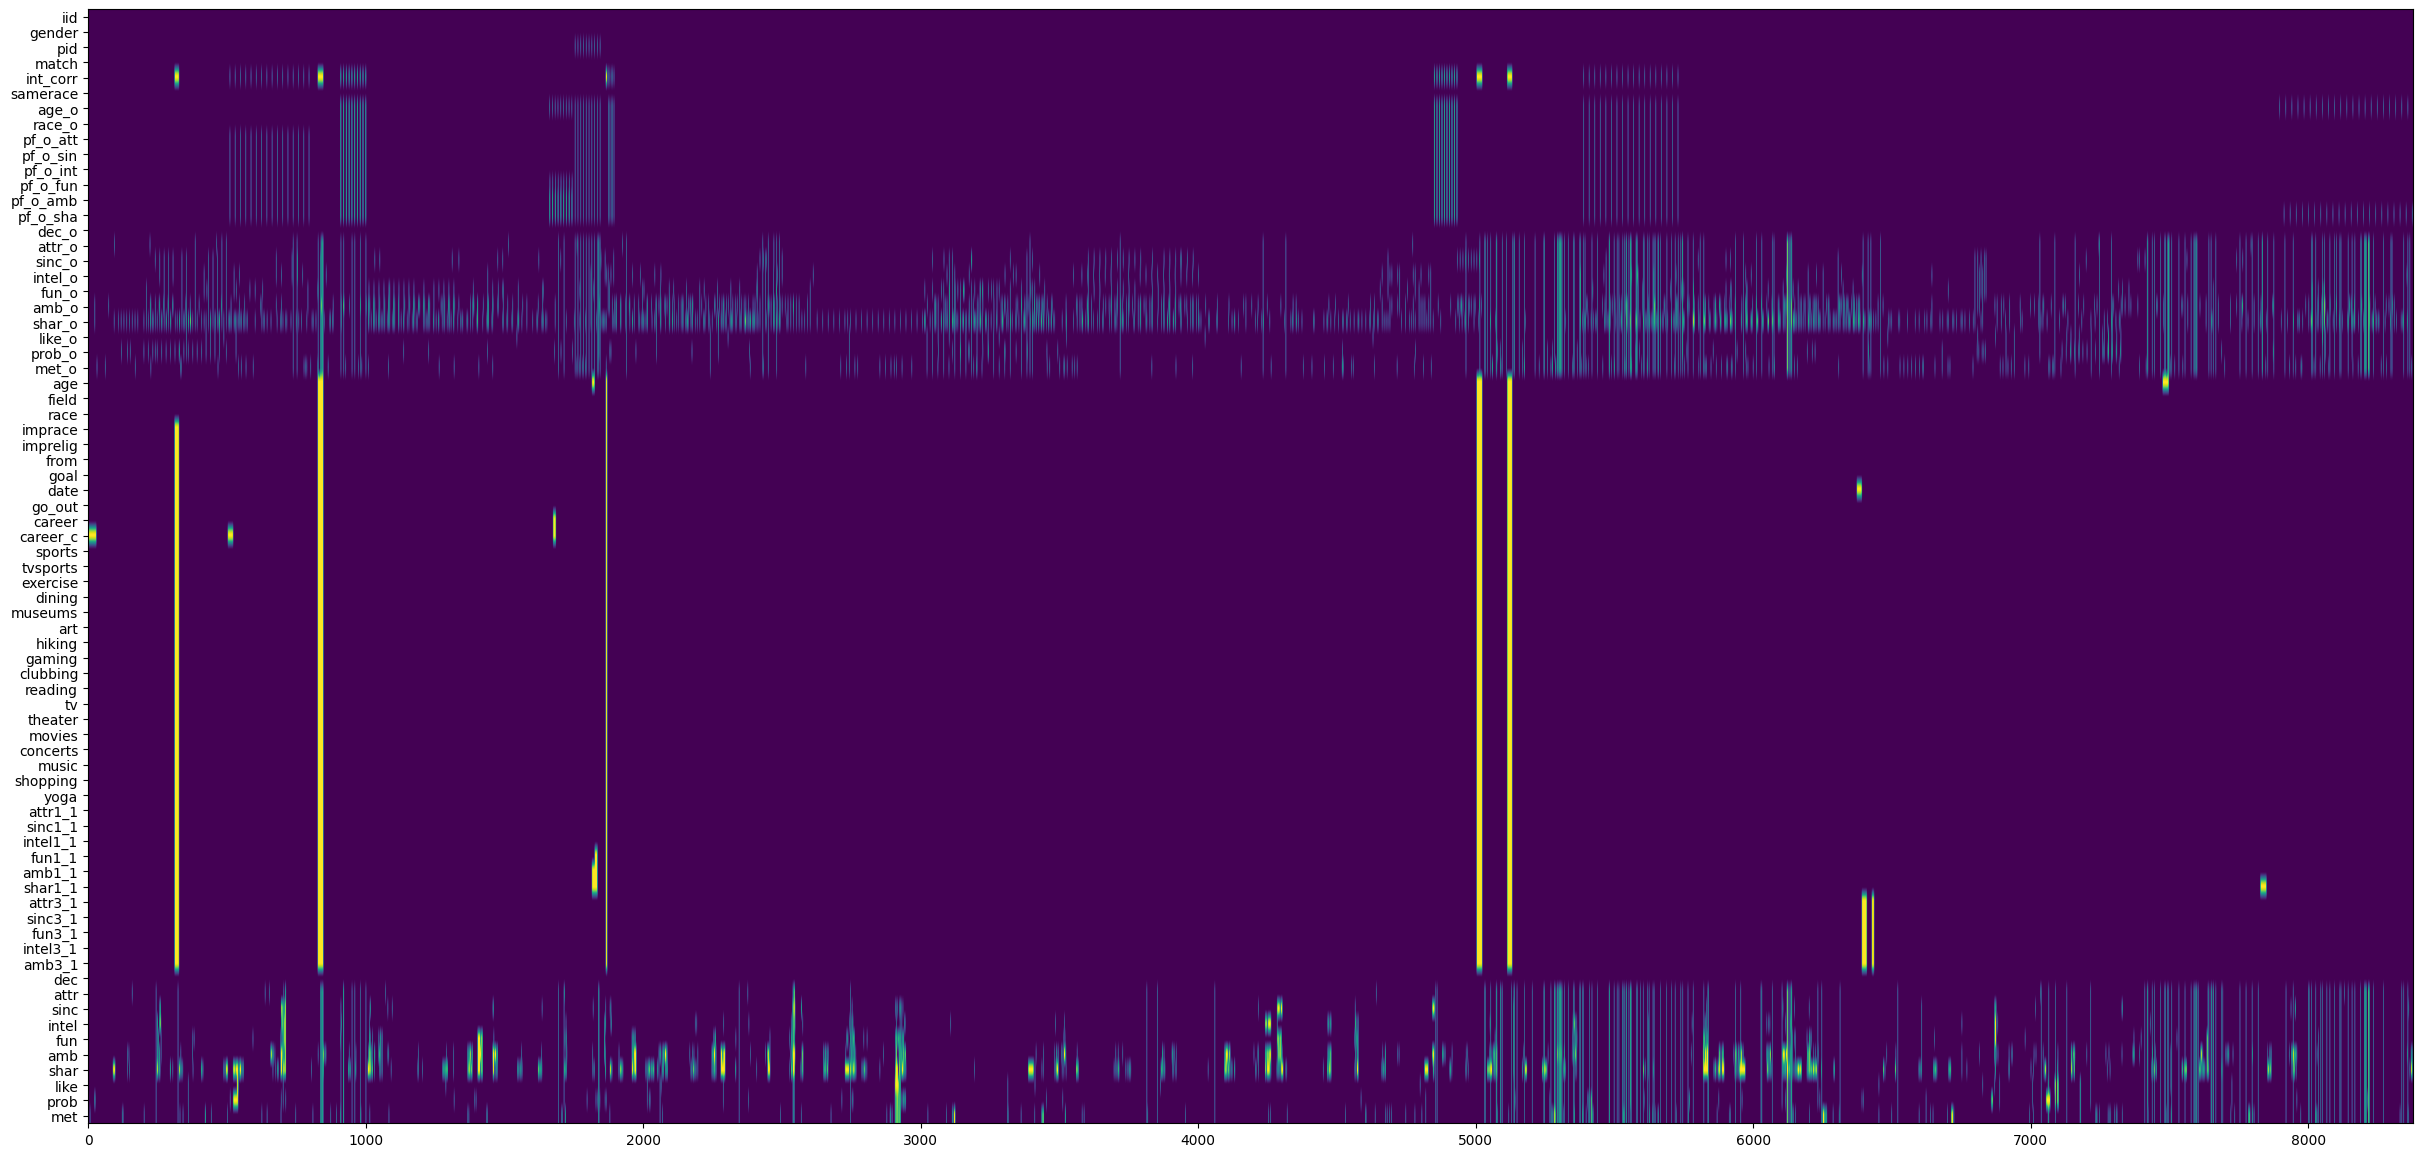

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(date.isna().values.T)
ax.set_aspect(55)
plt.yticks(range(date.shape[1]), date.columns);

#DATA CLEANING
Eliminar columnas innecesarias y rellenar los valores faltantes con el promedio (u otra estrategia) es una parte fundamental del preprocesamiento de datos. Ayuda a simplificar el conjunto de datos y a garantizar que esté completo y listo para el análisis o modelado posterior, lo que mejora la calidad de los resultados finales.

In [ ]:
date = date.drop(['iid','pid','field', 'from', 'career',], axis=1)

In [ ]:
date = date.drop(['dec','dec_o',], axis=1)# estan relacionadas directamente con a variable objetivo y sesgan el resultado del experimento

In [ ]:
date['int_corr'] = date['int_corr'].fillna(0)
date['career_c'] = date['career_c'].fillna(15)# 15 corresponde a otras carreras
date[['race_o','race','imprace', 'imprelig','goal', 'date', 'go_out']] = date[['race_o','race','imprace', 'imprelig','goal', 'date', 'go_out']].fillna(date.mode())
date = date.fillna(date.mean()) # Para todo lo demas usar la media

In [ ]:
dic = {'int64': [], 'float64': []}
for c in date.columns:
    dic[f'{date[c].dtype}'].append(c)
print (dic)

{'int64': ['gender', 'match', 'samerace'], 'float64': ['int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']}


Normalizar por minimo maximo

In [ ]:
for col in date.columns:
  date[col] = MinMaxScaler().fit_transform(np.array(date[col]).reshape(-1,1))

## Salida
Se Exporta la data luego proceso de limpieza y se carga al repositorio Github para futuros procesos.

In [ ]:
date.to_csv('data_clean.csv')